In [1]:
import yaml
import os
from ultralytics import YOLO

# 1. The exact path the search script just found
yaml_path = "../Infrastructure-Defects-Detection-4/data.yaml"

# 2. Fix the labels programmatically!
correct_names = {
    0: 'crack',
    1: 'spalling',
    2: 'exposed_rebar',
    3: 'corrosion',
    4: 'efflorescence',
    5: 'delamination'
}

with open(yaml_path, 'r') as file:
    yaml_data = yaml.safe_load(file)

yaml_data['names'] = correct_names

with open(yaml_path, 'w') as file:
    yaml.dump(yaml_data, file, sort_keys=False)

print(" Labels successfully updated in data.yaml!")



print("Loading YOLOv8 model...")
model = YOLO('yolov8n.pt')

print("Starting training... watch that GPU fly!")
results = model.train(
    data=yaml_path,
    epochs=20,                  
    imgsz=640,                  
    batch=16,                   
    project='../outputs/models', 
    name='defect_detector_school_run'    
)

print("Training complete! Model weights saved.")

✅ Labels successfully updated in data.yaml!
Loading YOLOv8 model...
Starting training... watch that GPU fly!
Ultralytics 8.4.16 🚀 Python-3.13.7 torch-2.10.0+cu128 CPU (Intel Xeon Gold 6248 CPU @ 2.50GHz)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=../Infrastructure-Defects-Detection-4/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0

In [1]:
%matplotlib inline

Running inference on: Test-Data-Image-9_png.rf.f28aed6b800659ba02ebdb924306edeb.jpg

image 1/1 /homes/rboabeng/Desktop/infrastructure-defect-detection-yolo/notebooks/../Infrastructure-Defects-Detection-4/test/images/Test-Data-Image-9_png.rf.f28aed6b800659ba02ebdb924306edeb.jpg: 640x640 2 spallings, 1 delamination, 60.9ms
Speed: 2.7ms preprocess, 60.9ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 640)


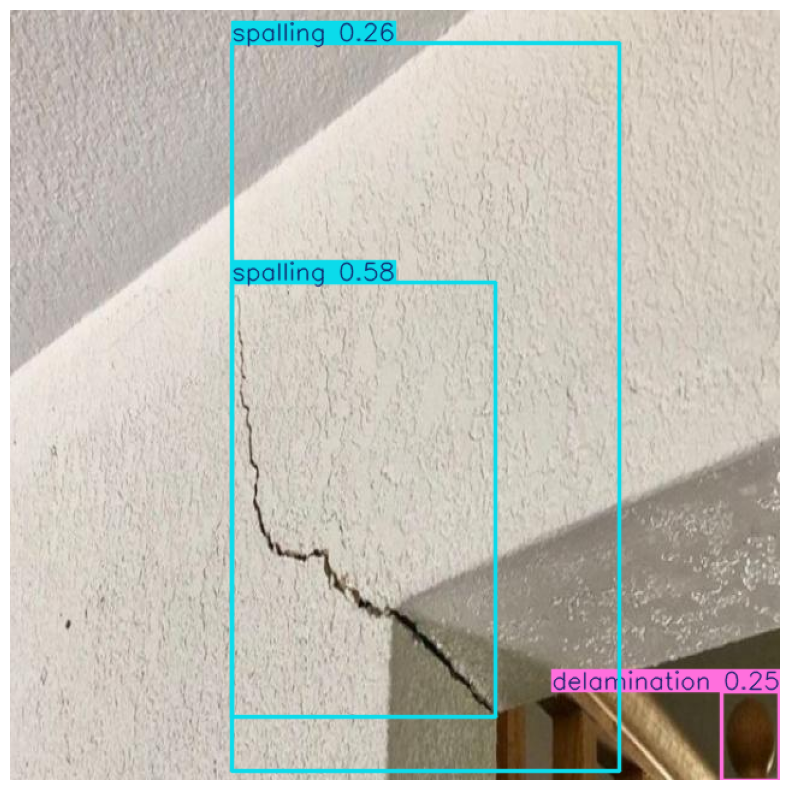

In [2]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# 1. Load YOUR custom trained model!
model_path = "../runs/outputs/models/defect_detector_school_run/weights/best.pt"
custom_model = YOLO(model_path)

# 2. Pick a random image from the testing folder (images the model has NEVER seen)
test_dir = "../Infrastructure-Defects-Detection-4/test/images"
test_image_name = os.listdir(test_dir)[0]
test_image_path = os.path.join(test_dir, test_image_name)

# 3. Run the AI! 
print(f"Running inference on: {test_image_name}")
results = custom_model(test_image_path)

# 4. Display the result
# YOLOv8 automatically draws the boxes and saves it in memory. We just extract it.
res_plotted = results[0].plot()
res_rgb = cv2.cvtColor(res_plotted, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 10))
plt.imshow(res_rgb)
plt.axis('off')
plt.show()